# Laboratorium 1.

## a) Proszę zainstalować bibliotekę OpenCV/upewnić się że jest zainstalowana

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## b) Proszę wczytać zamieszczony w folderze przedmiotu obraz lab1.jpg, sprawdzić jego parametry i wyświetlić

In [ ]:
image = cv2.imread("/content/drive/MyDrive/AiPO/lab1.jpg")
image.shape

(853, 1280, 3)

In [ ]:
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

## c) Podejrzyj zawartość indywidualnego piksela.

In [ ]:
(B, G, R) = image[70, 10]
B,G,R

(101, 145, 192)

## d) Wytnij z obrazu jedną z twarzy

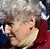

In [ ]:
cv2_imshow(image[1:50,170:220])

## e) Zmniejsz obraz o 50% - obliczając automatycznie new_x, new_y tak by zachować proporcję wymiarów obrazu

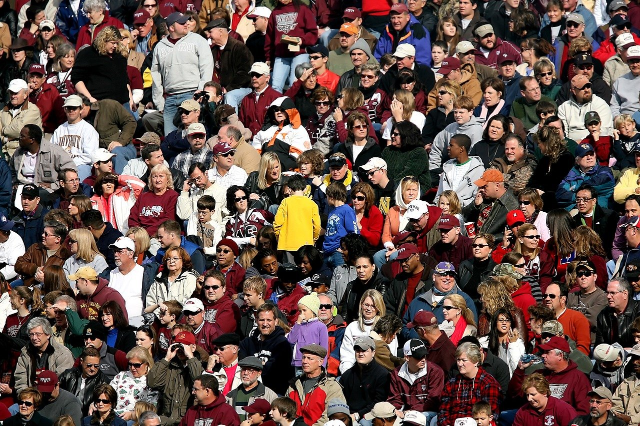

In [ ]:
new_x = int(image.shape[1]/2)
new_y = int(image.shape[0]/2)
resized = cv2.resize(image, (new_x, new_y))
cv2_imshow(resized)

## f) Obróć pierwotny obraz o 30 stopni zgodnie przeciwnie do ruchu wskazówek zegara.
#Spróbuj znaleźć rozwiązanie dla problemu wychodzenia obróconego obrazu poza okno pierwotnego obrazu

In [ ]:
#Obróć pierwotny obraz o 30 stopni zgodnie przeciwnie do ruchu wskazówek zegara.
center = (new_x, new_y)
rotate_matrix = cv2.getRotationMatrix2D(center, angle=30, scale=1)

#wyliczenie rozmiaru obrazka
import numpy as np
cos = np.abs(rotate_matrix[0,0])
sin = np.abs(rotate_matrix[0,1])
n_w = int((image.shape[1]*cos)+(image.shape[0]*sin))
n_h = int((image.shape[0]*cos)+(image.shape[1]*sin))

#dodanie marginesow
rotate_matrix[0,2] += (n_w/2) - (image.shape[1]/2)
rotate_matrix[1,2] += (n_h/2) - (image.shape[0]/2)

rotated_image = cv2.warpAffine(image, rotate_matrix, (n_w, n_h))
cv2_imshow(rotated_image)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
rotate_matrix = cv2.getRotationMatrix2D(center, angle=-30, scale=1)

#wyliczenie rozmiaru obrazka
import numpy as np
cos = np.abs(rotate_matrix[0,0])
sin = np.abs(rotate_matrix[0,1])
n_w = int((image.shape[1]*cos)+(image.shape[0]*sin))
n_h = int((image.shape[0]*cos)+(image.shape[1]*sin))

#dodanie marginesow
rotate_matrix[0,2] += (n_w/2) - (image.shape[1]/2)
rotate_matrix[1,2] += (n_h/2) - (image.shape[0]/2)

rotated_image = cv2.warpAffine(image, rotate_matrix, (n_w, n_h))
cv2_imshow(rotated_image)


Output hidden; open in https://colab.research.google.com to view.

## g) Oznacz jedną z twarzy na pierwotnym obrazie czerwonym prostokątem i podpisz poniżej imieniem i nazwiskiem 

In [ ]:
image2 = image.copy() 
cv2.rectangle(image2, (170, 0), (220, 50), (0, 0, 255), 2)
image2 = cv2.putText(image2, 'Grazyna Kowalska', (100, 70), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(image2)

Output hidden; open in https://colab.research.google.com to view.

## h) Zapisz obraz z punktu g)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/AiPO/lab1_z_podpisem.jpg", image2)

True

## i) Tematy dodatkowe:
>a. Proszę policzyć łączną liczbę kolorów użytych w obrazie




In [ ]:
print("Łączna liczbę kolorów użytych w obrazie wynosi:")
np.unique(image.reshape(-1, image.shape[2]), axis=0).shape[0]

Łączna liczbę kolorów użytych w obrazie wynosi:


262240


> b. Proszę zapisać obraz w skali szarośc


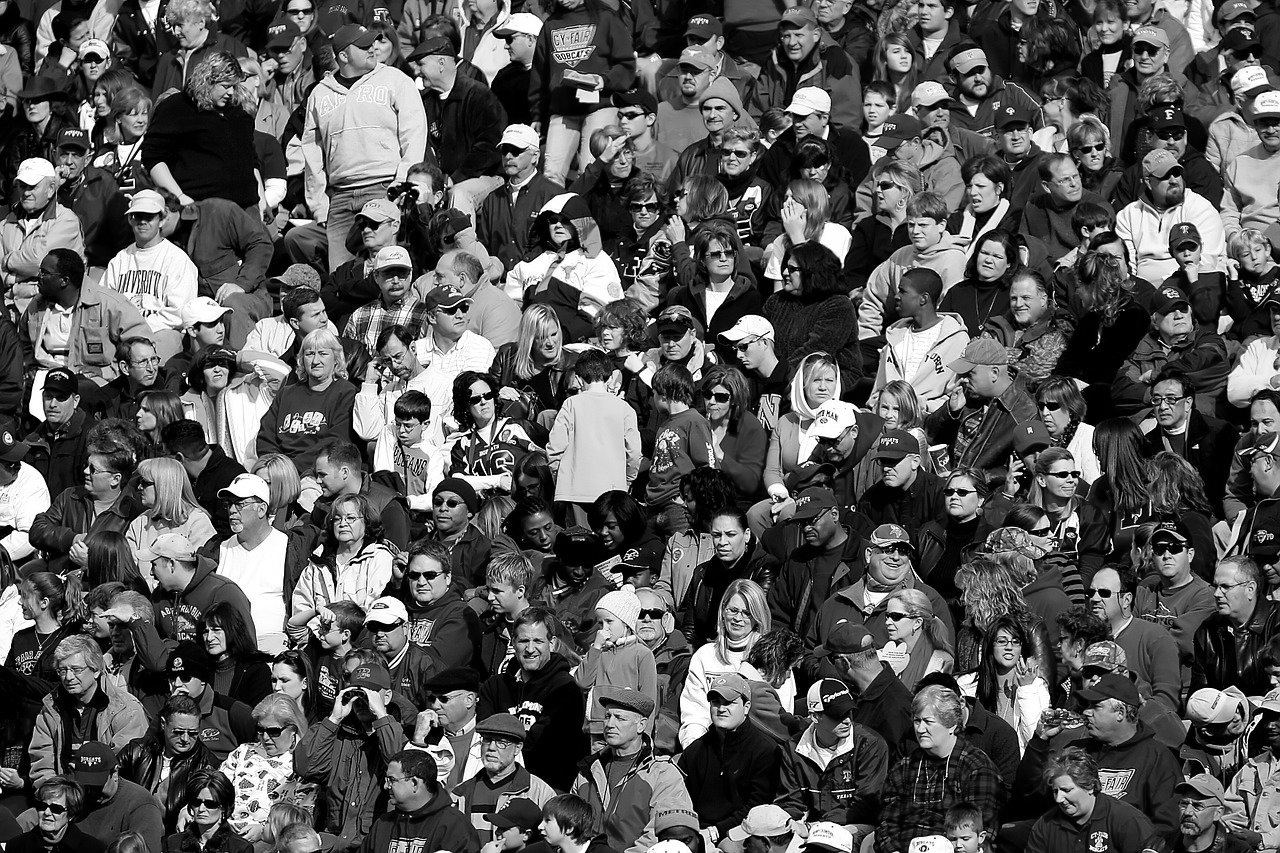

True

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.imwrite("/content/drive/MyDrive/AiPO/lab1_skala_szarosci.jpg", gray)